In [22]:
import tensorflow as tf
from pathlib import Path
import pandas as pd
import numpy as np
import pickle as pkl
from scipy import signal
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

import sys
sys.path.append('..')

import networks
import metrics
import evaluate
from datasets import seq2seq_generator, seq2seq_generator_with_aug

%matplotlib inline

In [2]:
# Load data
with open('../data/yearly_24_train.pkl', 'rb') as f:
    data = pkl.load(f)

In [4]:
data[0].shape, data[1].shape

((176595, 18), (176595, 6))

In [10]:
scipy.signal.detrend(data[0][0])

array([-0.08384428,  0.12679391,  0.05010217, -0.14965688,  0.20694949,
        0.0464112 ,  0.10928647, -0.40499883, -0.14479229, -0.067033  ,
        0.24989853,  0.22681043,  0.15375151, -0.03142446, -0.3009529 ,
       -0.31366203, -0.04276119,  0.36912216])

In [17]:
lr = LinearRegression()
lr.fit(np.arange(18).reshape(-1, 1), data[0][0])
line = lr.predict(np.arange(18).reshape(-1, 1))

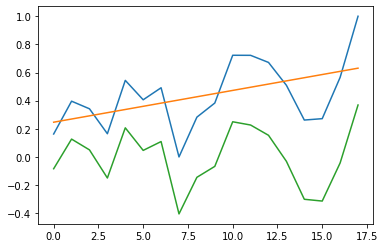

In [19]:
plt.plot(data[0][0])
plt.plot(line)
plt.plot(data[0][0] - line)

In [20]:
def decompose(points):
    lr = LinearRegression()
    x = np.arange(len(points)).reshape(-1, 1)
    lr.fit(x, points)
    line = lr.predict(x)
    return line, points - line

In [25]:
trends, residuals = [], []

for ts in tqdm(data[0]):
    trend, residual = decompose(ts)
    trends.append(trend)
    residuals.append(residual)

100%|██████████| 176595/176595 [00:50<00:00, 3478.72it/s]


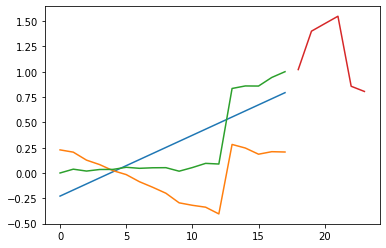

In [29]:
i = 1000

plt.plot(range(18), trends[i])
plt.plot(range(18), residuals[i])
plt.plot(range(18), trends[i] + residuals[i])

plt.plot(range(18, 24), data[1][i])

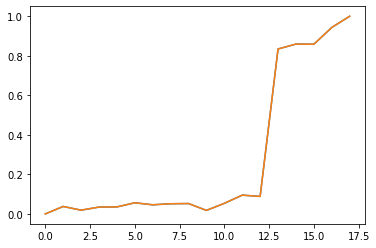

In [31]:
plt.plot(range(18), trends[i] + residuals[i])
plt.plot(range(18), data[0][i])